---
Log likelihood values will be printed until it exceeds -150:
-8835.189504900649
-314.0380450856512
-304.6660844802359
-302.6787408170902
-302.09863921794005
-301.9058173849463

Calculated weights:  [-13.04631356  -4.63092541   7.70594474]
SK-Learn weights:  [-13.32341472] [[-4.72755395  7.86660682]]

Accuracy from scratch: 0.9945
Accuracy from SK-Learn: 0.9945


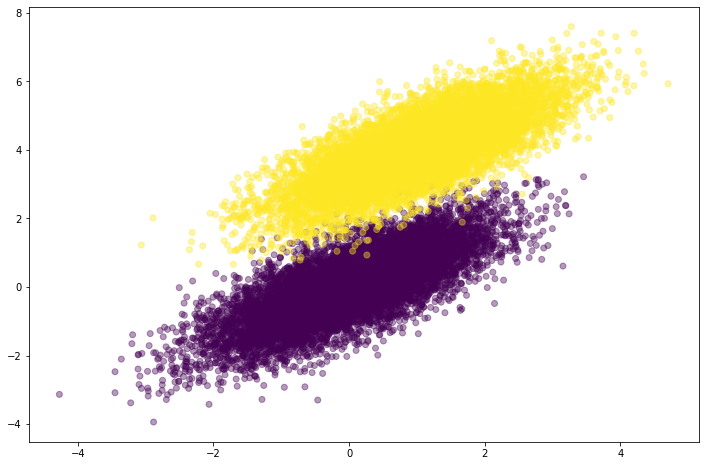

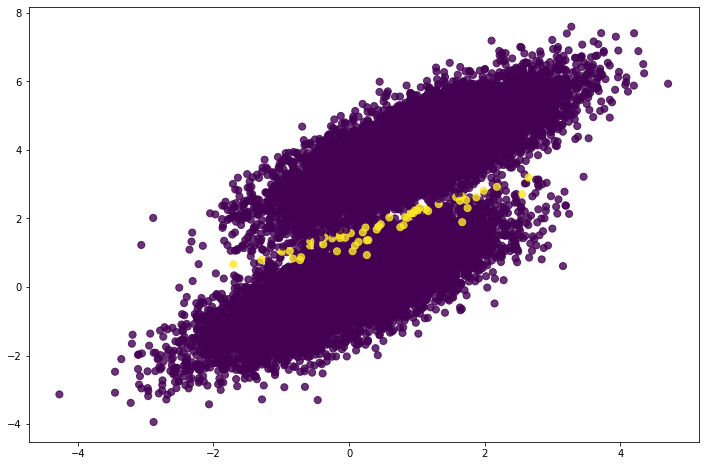

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)
num_observations = 10000

x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                                        np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

    # Picking a link function (the sigmoid)
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

    # Maximising the likelihood
        # Calculating the log-likelihood
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

    # Building the logistic regression function
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

            # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

            # Print log-likelihood every so often
        if step % 5000 == 0:
               print(log_likelihood(features, target, weights))
               if log_likelihood(features, target, weights) >= -1000:
                   break;

    return weights

        ##### Edit learning rate here
print("---")
print("Log likelihood values will be printed until it exceeds -1000:")
weights = logistic_regression(simulated_separableish_features, simulated_labels, num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

    # Comparing with Sk-Learn's logistic regression
        # As Sk-Learn's LR automatically does L2 regularization, we have to set C=1e15 to turn it off
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print()
print("Calculated weights: ", + weights)
print("SK-Learn weights: ", + clf.intercept_, clf.coef_)

    # Find the accuracy
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                    simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print()
print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print('Accuracy from SK-Learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)
